# Gradient Descent in Scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [2]:
X_train, y_train = load_house_data()
X_features = ['size_sqft','n_bedrooms','n_floors','age']

In [3]:
# z-score normalization
scaler = StandardScaler()   # with_std and with_mean are set to True by default
print(f'Peak to peak range for features in X_train before normalization: {np.ptp(X_train, axis=0)}')
X_norm = scaler.fit_transform(X_train)
print(f'Peak to peak range for features in X_norm after normalization: {np.ptp(X_norm, axis=0)}')

Peak to peak range for features in X_train before normalization: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to peak range for features in X_norm after normalization: [5.85 6.14 2.06 3.69]


In [4]:
# Create the GD regression model
gdr = SGDRegressor(max_iter=1000) # Stochastic Gradient Descent Regressor
print(f'Created Gradient Descent Regressor.')
print('params:')
print(f'alpha: {gdr.alpha}')
print(f'max_iter: {gdr.max_iter}')
print(f'Loss computation method: {gdr.loss}')

Created Gradient Descent Regressor.
params:
alpha: 0.0001
max_iter: 1000
Loss computation method: squared_error


In [5]:
gdr.fit(X_norm, y_train);
optimal_w = gdr.coef_
optimal_b = gdr.intercept_
print(f'Computed w={optimal_w} and b={optimal_b} in {gdr.n_iter_} iterations.')

Computed w=[110.14 -21.08 -32.5  -38.03] and b=[363.16] in 125 iterations.


In [6]:
# Predictions on training data (all correct is expected)

preds_with_predict = gdr.predict(X_norm)
preds = X_norm @ optimal_w + optimal_b

print(f'Predictions match? {(preds_with_predict == preds).all()}')

Predictions match? True


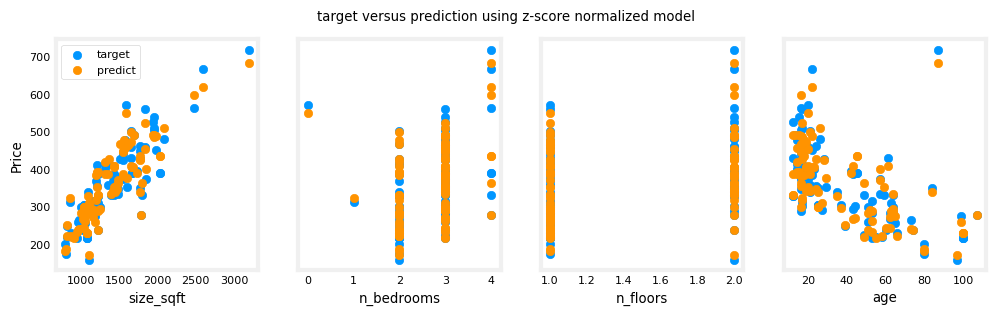

In [7]:
# Plot
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    
    # scatters X_train over real values
    ax[i].scatter(X_train[:,i], y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    
    # Scatter X_train over preds
    ax[i].scatter(X_train[:,i], preds, color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()